# Lateral fill on model grid

This example shows how to apply `pop_tools.lateral_fill` on a model dataset. We use a model grid dataset for illustration purposes.

In [1]:
%matplotlib inline
import numpy as np
import pop_tools

In [2]:
ds = pop_tools.get_grid('POP_gx3v7')
ds

<xarray.Dataset>
Dimensions:  (nlat: 116, nlon: 100, z_t: 60, z_w: 60, z_w_bot: 60)
Coordinates:
  * z_t      (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * z_w      (z_w) float64 0.0 1e+03 2e+03 3e+03 ... 4.75e+05 5e+05 5.25e+05
  * z_w_bot  (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5e+05 5.25e+05 5.5e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    TLAT     (nlat, nlon) float64 -79.5 -79.5 -79.5 -79.5 ... 68.36 68.26 68.21
    TLONG    (nlat, nlon) float64 323.3 326.9 330.5 334.1 ... 317.8 319.3 320.8
    ULAT     (nlat, nlon) float64 -78.73 -78.73 -78.73 ... 68.49 68.42 68.4
    ULONG    (nlat, nlon) float64 325.1 328.7 332.3 335.9 ... 318.7 320.1 321.5
    DXT      (nlat, nlon) float64 7.302e+06 7.302e+06 ... 6.099e+06 6.129e+06
    DYT      (nlat, nlon) float64 1.686e+07 1.686e+07 ... 4.535e+06 4.524e+06
    TAREA    (nlat, nlon) float64 7.053e+15 7.053e+15 ... 1.585e+15 1.589e+15
    KMT      (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 

## Generate a field with some missing values

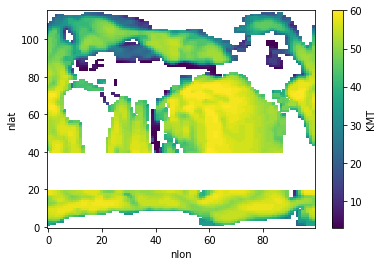

In [3]:
field = ds.KMT.copy() * 1.
field = field.where(ds.KMT > 0)
field.values[20:40, :] = np.nan
field.plot()

## Fill the missing values

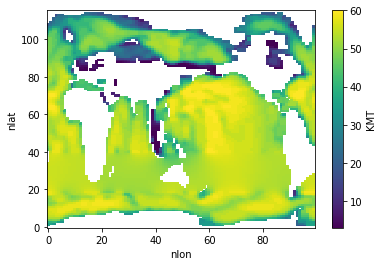

In [4]:
field_filled = pop_tools.lateral_fill(field, isvalid_mask=(ds.KMT > 0))
h = field_filled.plot()